In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import re, os
from pathlib import Path

files = list(Path('.').glob('data*.csv'))
load_data = []

for i,f in enumerate(files):
    df = pd.read_csv(f.name)
    load_data.append(
        (
            df['Broadcast Messages'].mean(), # avg
            df['Broadcast Messages'].std(),  # std
            df['Broadcast Messages'].sum(),  # total
            1/(1<<(i+3)) * 100            # ideal percent
        )
    )

# make them percentages
load_data = list(map(lambda t: (t[0]/t[2]*100, t[1]/t[2]*100, t[3]), load_data))

print(load_data)

[(12.5, 0.0, 12.5), (6.25, 0.0, 6.25), (3.125, 0.0, 3.125), (1.5625, 0.0, 1.5625), (0.78125, 0.0, 0.78125), (0.390625, 0.0, 0.390625)]


In [13]:
log_files = list(Path('.').glob('log_out_*.log'))
broad_data = []

for i,f in enumerate(log_files):
    text = f.read_text()
    hits = len(re.findall(r'true', text))
    miss = len(re.findall(r'false', text))
    broad_data.append([1 << (i+3), hits/(1 << (i+3)) * 100])

broad_df = pd.DataFrame(broad_data, columns=['Node Num', 'hit rate'])
broad_df

,Node Num,hit rate
0,8,100.0
1,16,100.0
2,32,100.0
3,64,100.0
4,128,100.0
5,256,100.0


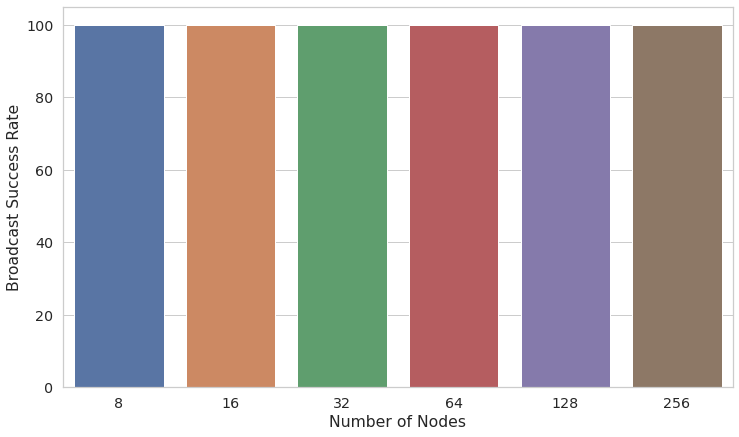

In [17]:
plt.figure(figsize=(12,7))
sns.set(font_scale = 1.3)

sns.set_style("whitegrid")
p = sns.barplot(x=broad_df['Node Num'], y=broad_df['hit rate'])
p.set(xlabel="Number of Nodes", ylabel="Broadcast Success Rate")

plt.show()